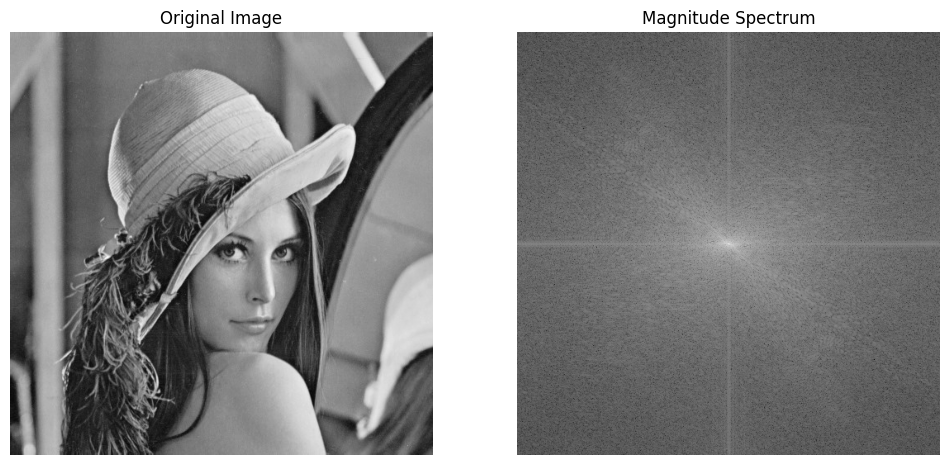

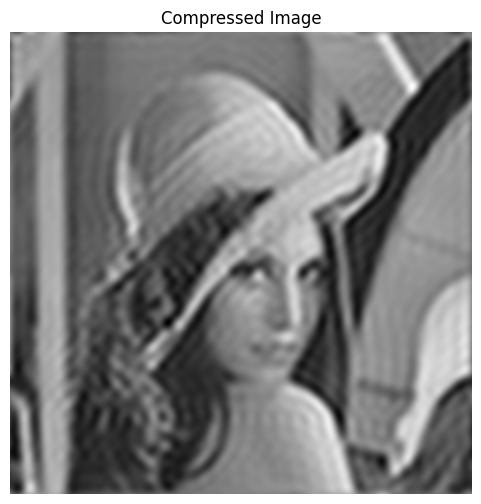

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Image.jpeg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fast Fourier Transform (FFT)
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center

# Visualize the magnitude spectrum
magnitude_spectrum = np.log1p(np.abs(dft_shift))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

# Compression: Keep only the central part of the frequency spectrum
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Adjust the size for compression

# Apply mask to DFT shifted image
dft_compressed = dft_shift * mask

# Perform inverse FFT to reconstruct image
dft_ishift = np.fft.ifftshift(dft_compressed)
img_reconstructed = np.fft.ifft2(dft_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Show compressed image
plt.figure(figsize=(6, 6))
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')
plt.show()



In [ ]:
# Save the image with PNG compression
image.save('compressed_image_png.png', format='PNG', optimize=True)

print("PNG Compression Done! Compressed image saved as 'compressed_image_png.png'")

PNG Compression Done! Compressed image saved as 'compressed_image_png.png'


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8877 - loss: 0.3847 - val_accuracy: 0.9703 - val_loss: 0.0946
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9799 - loss: 0.0708 - val_accuracy: 0.9808 - val_loss: 0.0675
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0433 - val_accuracy: 0.9831 - val_loss: 0.0571
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9844 - val_loss: 0.0547
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9829 - val_loss: 0.0566
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9827 - val_loss: 0.0611
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9860 - val_loss: 0.0580
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.

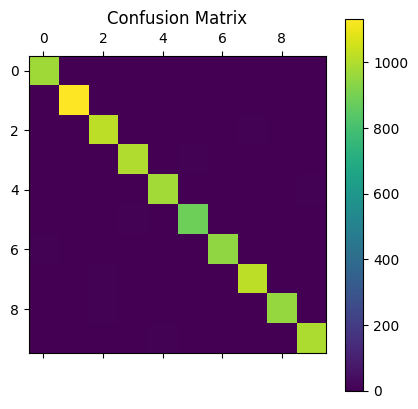

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision, recall, f1_score, _ = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg'].values()
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("ROC-AUC:", roc_auc)

# Plot Confusion Matrix
plt.matshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.title('Confusion Matrix')
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3593 - loss: 1.7563 - val_accuracy: 0.5434 - val_loss: 1.2973
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5653 - loss: 1.2158 - val_accuracy: 0.5991 - val_loss: 1.1721
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6321 - loss: 1.0569 - val_accuracy: 0.6332 - val_loss: 1.0426
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6653 - loss: 0.9540 - val_accuracy: 0.6538 - val_loss: 0.9997
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6968 - loss: 0.8720 - val_accuracy: 0.6588 - val_loss: 1.0003
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7198 - loss: 0.8103 - val_accuracy: 0.6853 - val_loss: 0.9274
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7438 - loss: 0.7398 - val_accuracy: 0.6837 - val_loss: 0.9419
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7633 - loss: 0.6843 - val_accuracy: 0.

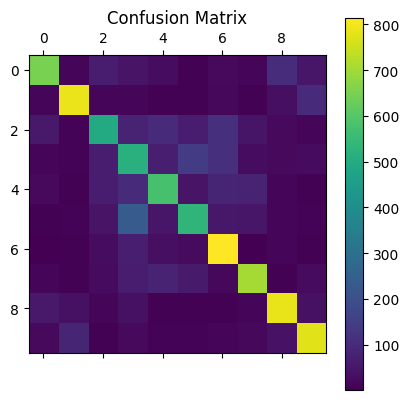

In [ ]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision, recall, f1_score, _ = classification_report(y_true_classes, y_pred_classes, output_dict=True)['weighted avg'].values()
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("ROC-AUC:", roc_auc)

# Plot Confusion Matrix
plt.matshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.title('Confusion Matrix')
plt.show()